# **Diabetes Prediction**
---
                                                                 Name : VISHNU E
                                                                 Organization : CognoRise InfoTech
                                                                 Date : 19/09/2024

## **Problem Statement**
---

To predict whether a patient has diabetes based on medical features such as glucose level, age, BMI, etc.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Exploratory Data Analysis

In [3]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# statistical summary of the dataframe

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# checking for null values

df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [6]:
# checking for duplicate values

duplicate_rows = df.duplicated(keep = False).sum()

print('Duplicate rows:')
duplicate_rows

Duplicate rows:


6939

In [7]:
# Show all duplicate rows, including the first occurrence
display_duplicate_rows = df[df.duplicated(keep=False)]

# Display all duplicates
print(display_duplicate_rows)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
1      Female  54.0             0              0         No Info  27.32   
10     Female  53.0             0              0           never  27.32   
14     Female  76.0             0              0         No Info  27.32   
18     Female  42.0             0              0         No Info  27.32   
41       Male   5.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
1              6.6                   80        

In [8]:
# removing duplicate rows

df_cleaned = df.drop_duplicates(keep = 'first')
df_cleaned

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


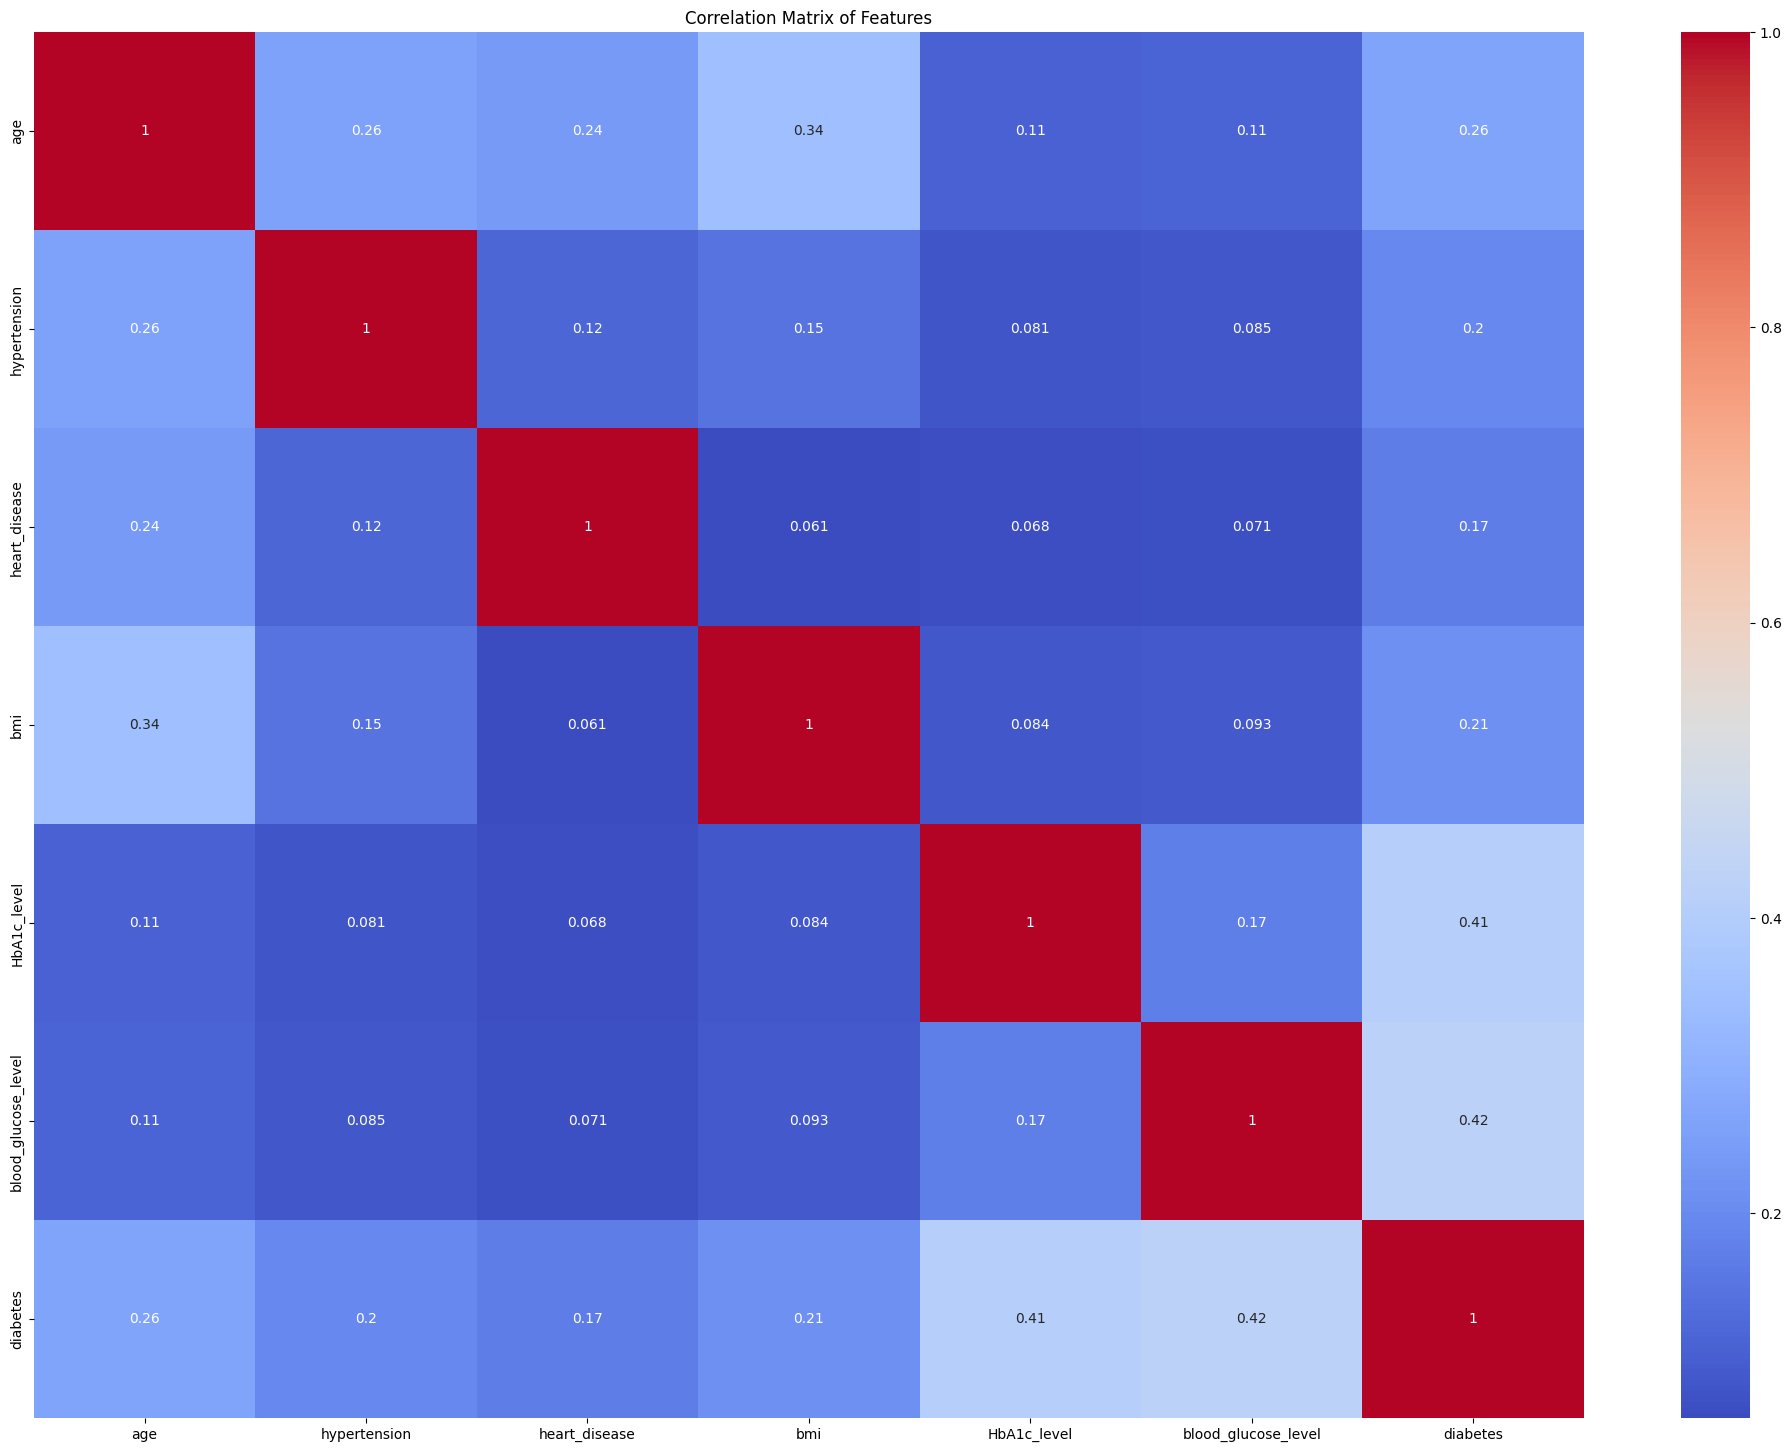

In [9]:
# correlation matrix

plt.figure(figsize=(25,18))
sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

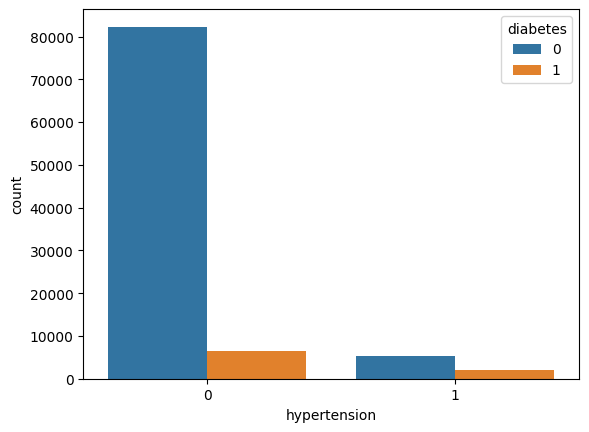

hypertension
0    88685
1     7461
Name: count, dtype: int64


In [10]:
# 'hypertension' distribution

sns.countplot(x = 'hypertension', data = df_cleaned, hue = 'diabetes')
plt.show()
print(df_cleaned['hypertension'].value_counts())

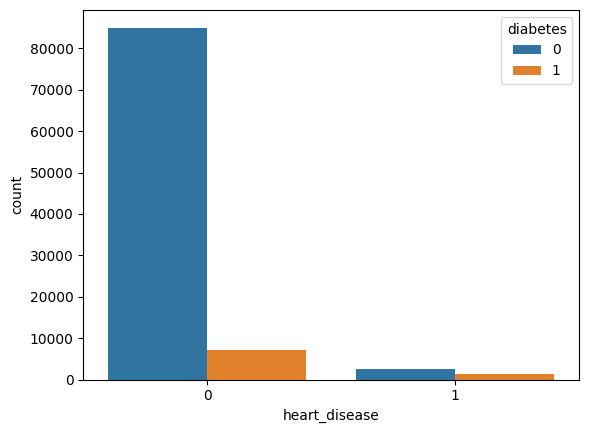

heart_disease
0    92223
1     3923
Name: count, dtype: int64


In [11]:
# 'heart disease' distribution

sns.countplot(x = 'heart_disease', data = df_cleaned, hue = 'diabetes')
plt.show()
print(df_cleaned['heart_disease'].value_counts())

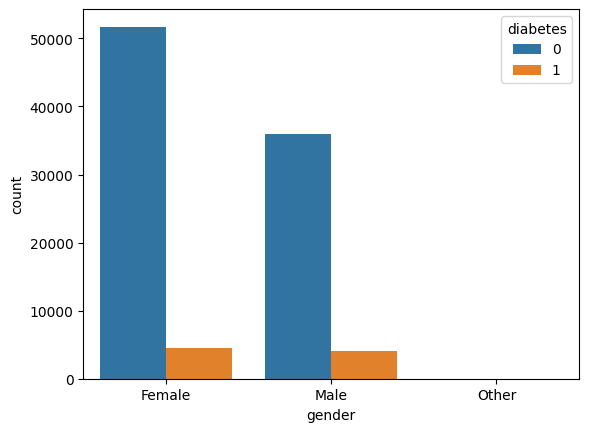

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


In [12]:
# 'gender' distribution

sns.countplot(x = 'gender', data = df_cleaned, hue = 'diabetes')
plt.show()
print(df_cleaned['gender'].value_counts())

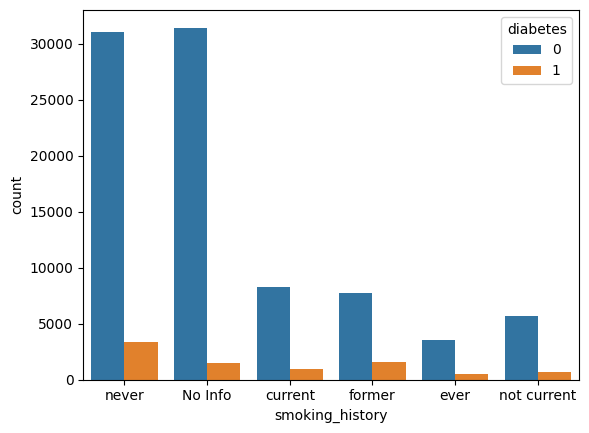

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


In [13]:
# 'smoking history' distribution

sns.countplot(x = 'smoking_history', data = df_cleaned, hue = 'diabetes')
plt.show()
print(df_cleaned['smoking_history'].value_counts())

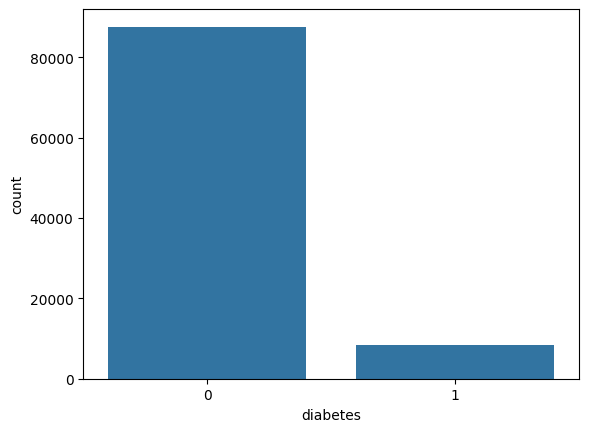

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [14]:
# target variable distribution

sns.countplot(x = 'diabetes', data = df_cleaned)
plt.show()
print(df_cleaned['diabetes'].value_counts())

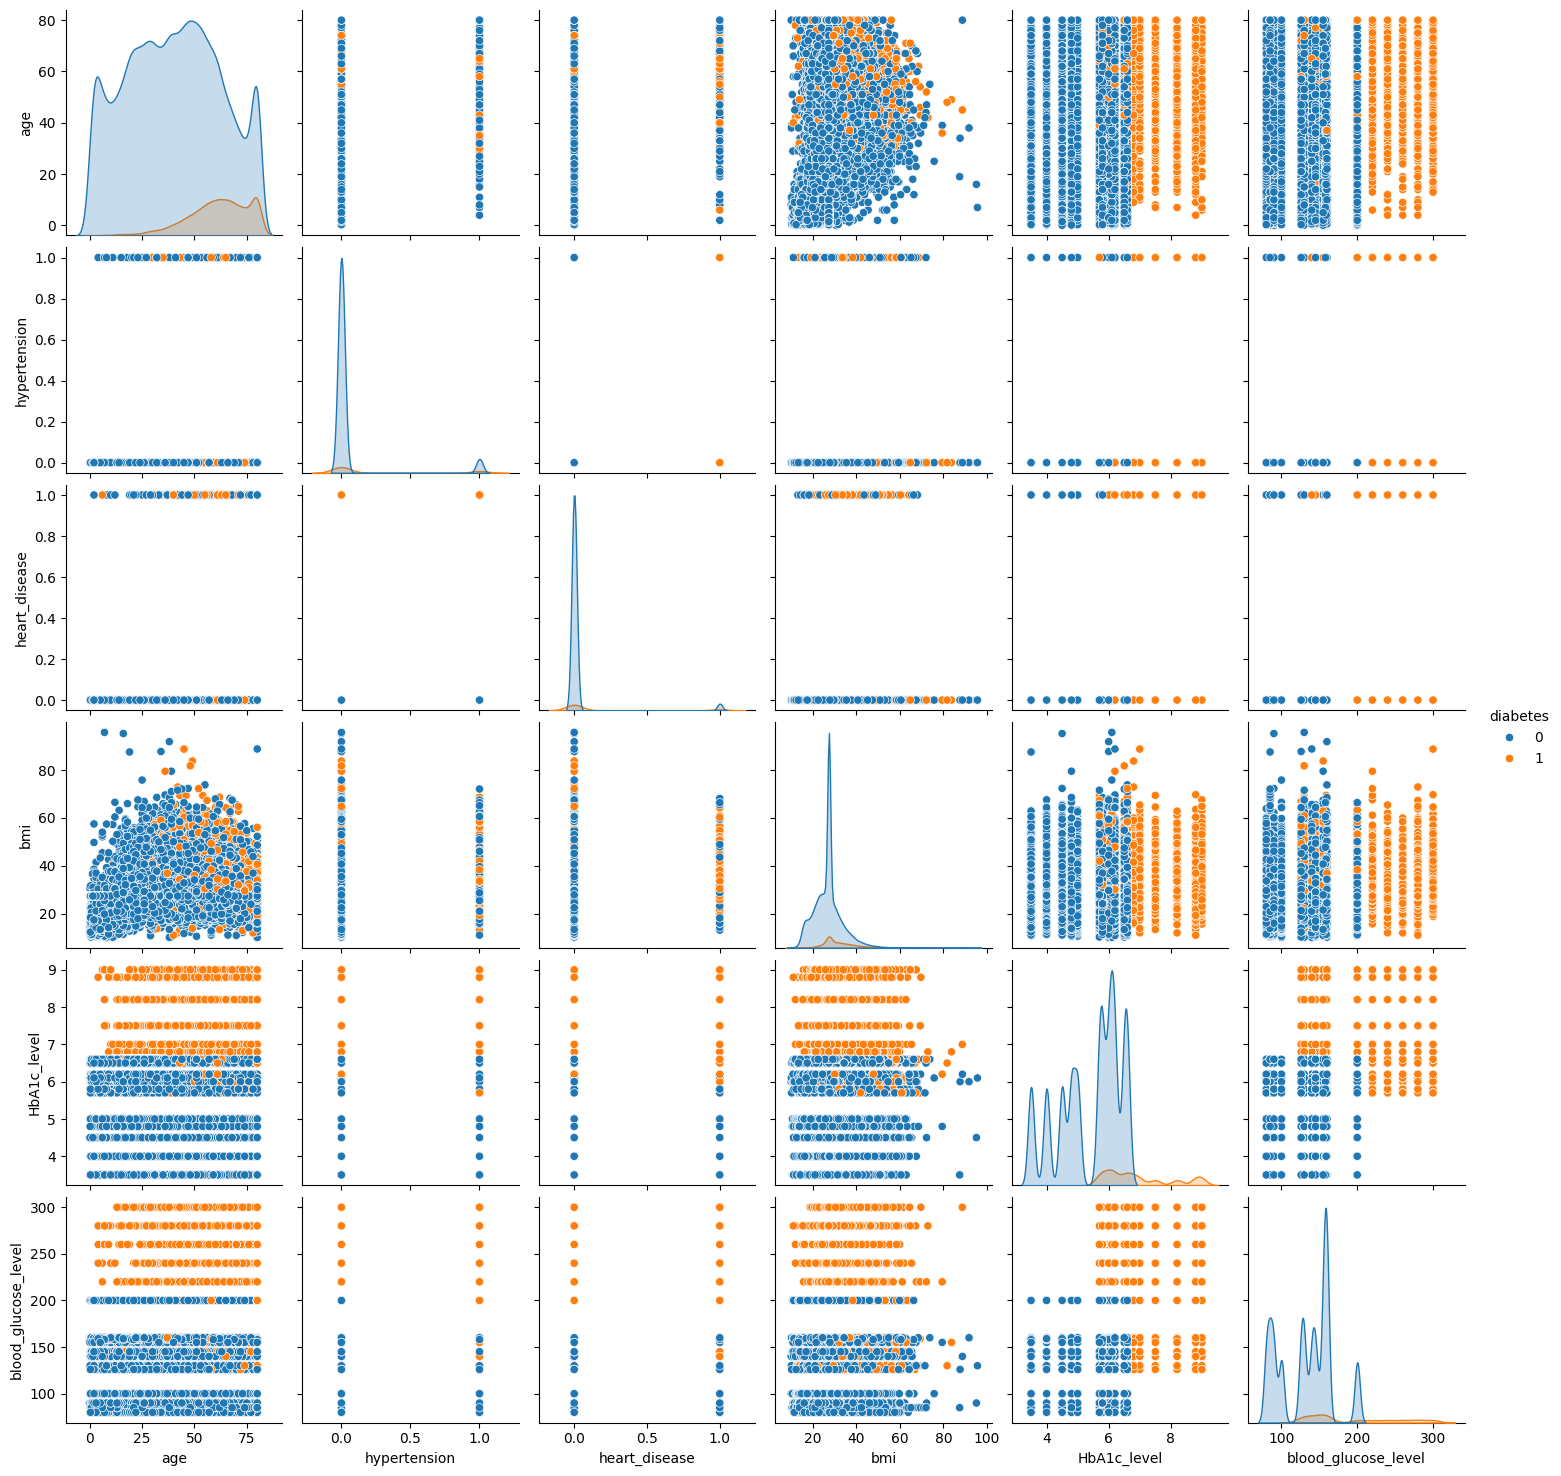

In [15]:
# pairplot of features

sns.pairplot(df_cleaned, hue = 'diabetes')

In [16]:
# Encoding categorical values

df_encoded = pd.get_dummies(df_cleaned, columns=['gender', 'smoking_history'], drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,0,0,0,0,0,0,0,0
2,28,0,0,27,5,158,0,1,0,0,0,0,1,0
3,36,0,0,23,5,155,0,0,0,1,0,0,0,0
4,76,1,1,20,4,155,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36,0,0,24,4,145,0,0,0,0,0,0,0,0
99996,2,0,0,17,6,100,0,0,0,0,0,0,0,0
99997,66,0,0,27,5,155,0,1,0,0,0,1,0,0
99998,24,0,0,35,4,100,0,0,0,0,0,0,1,0


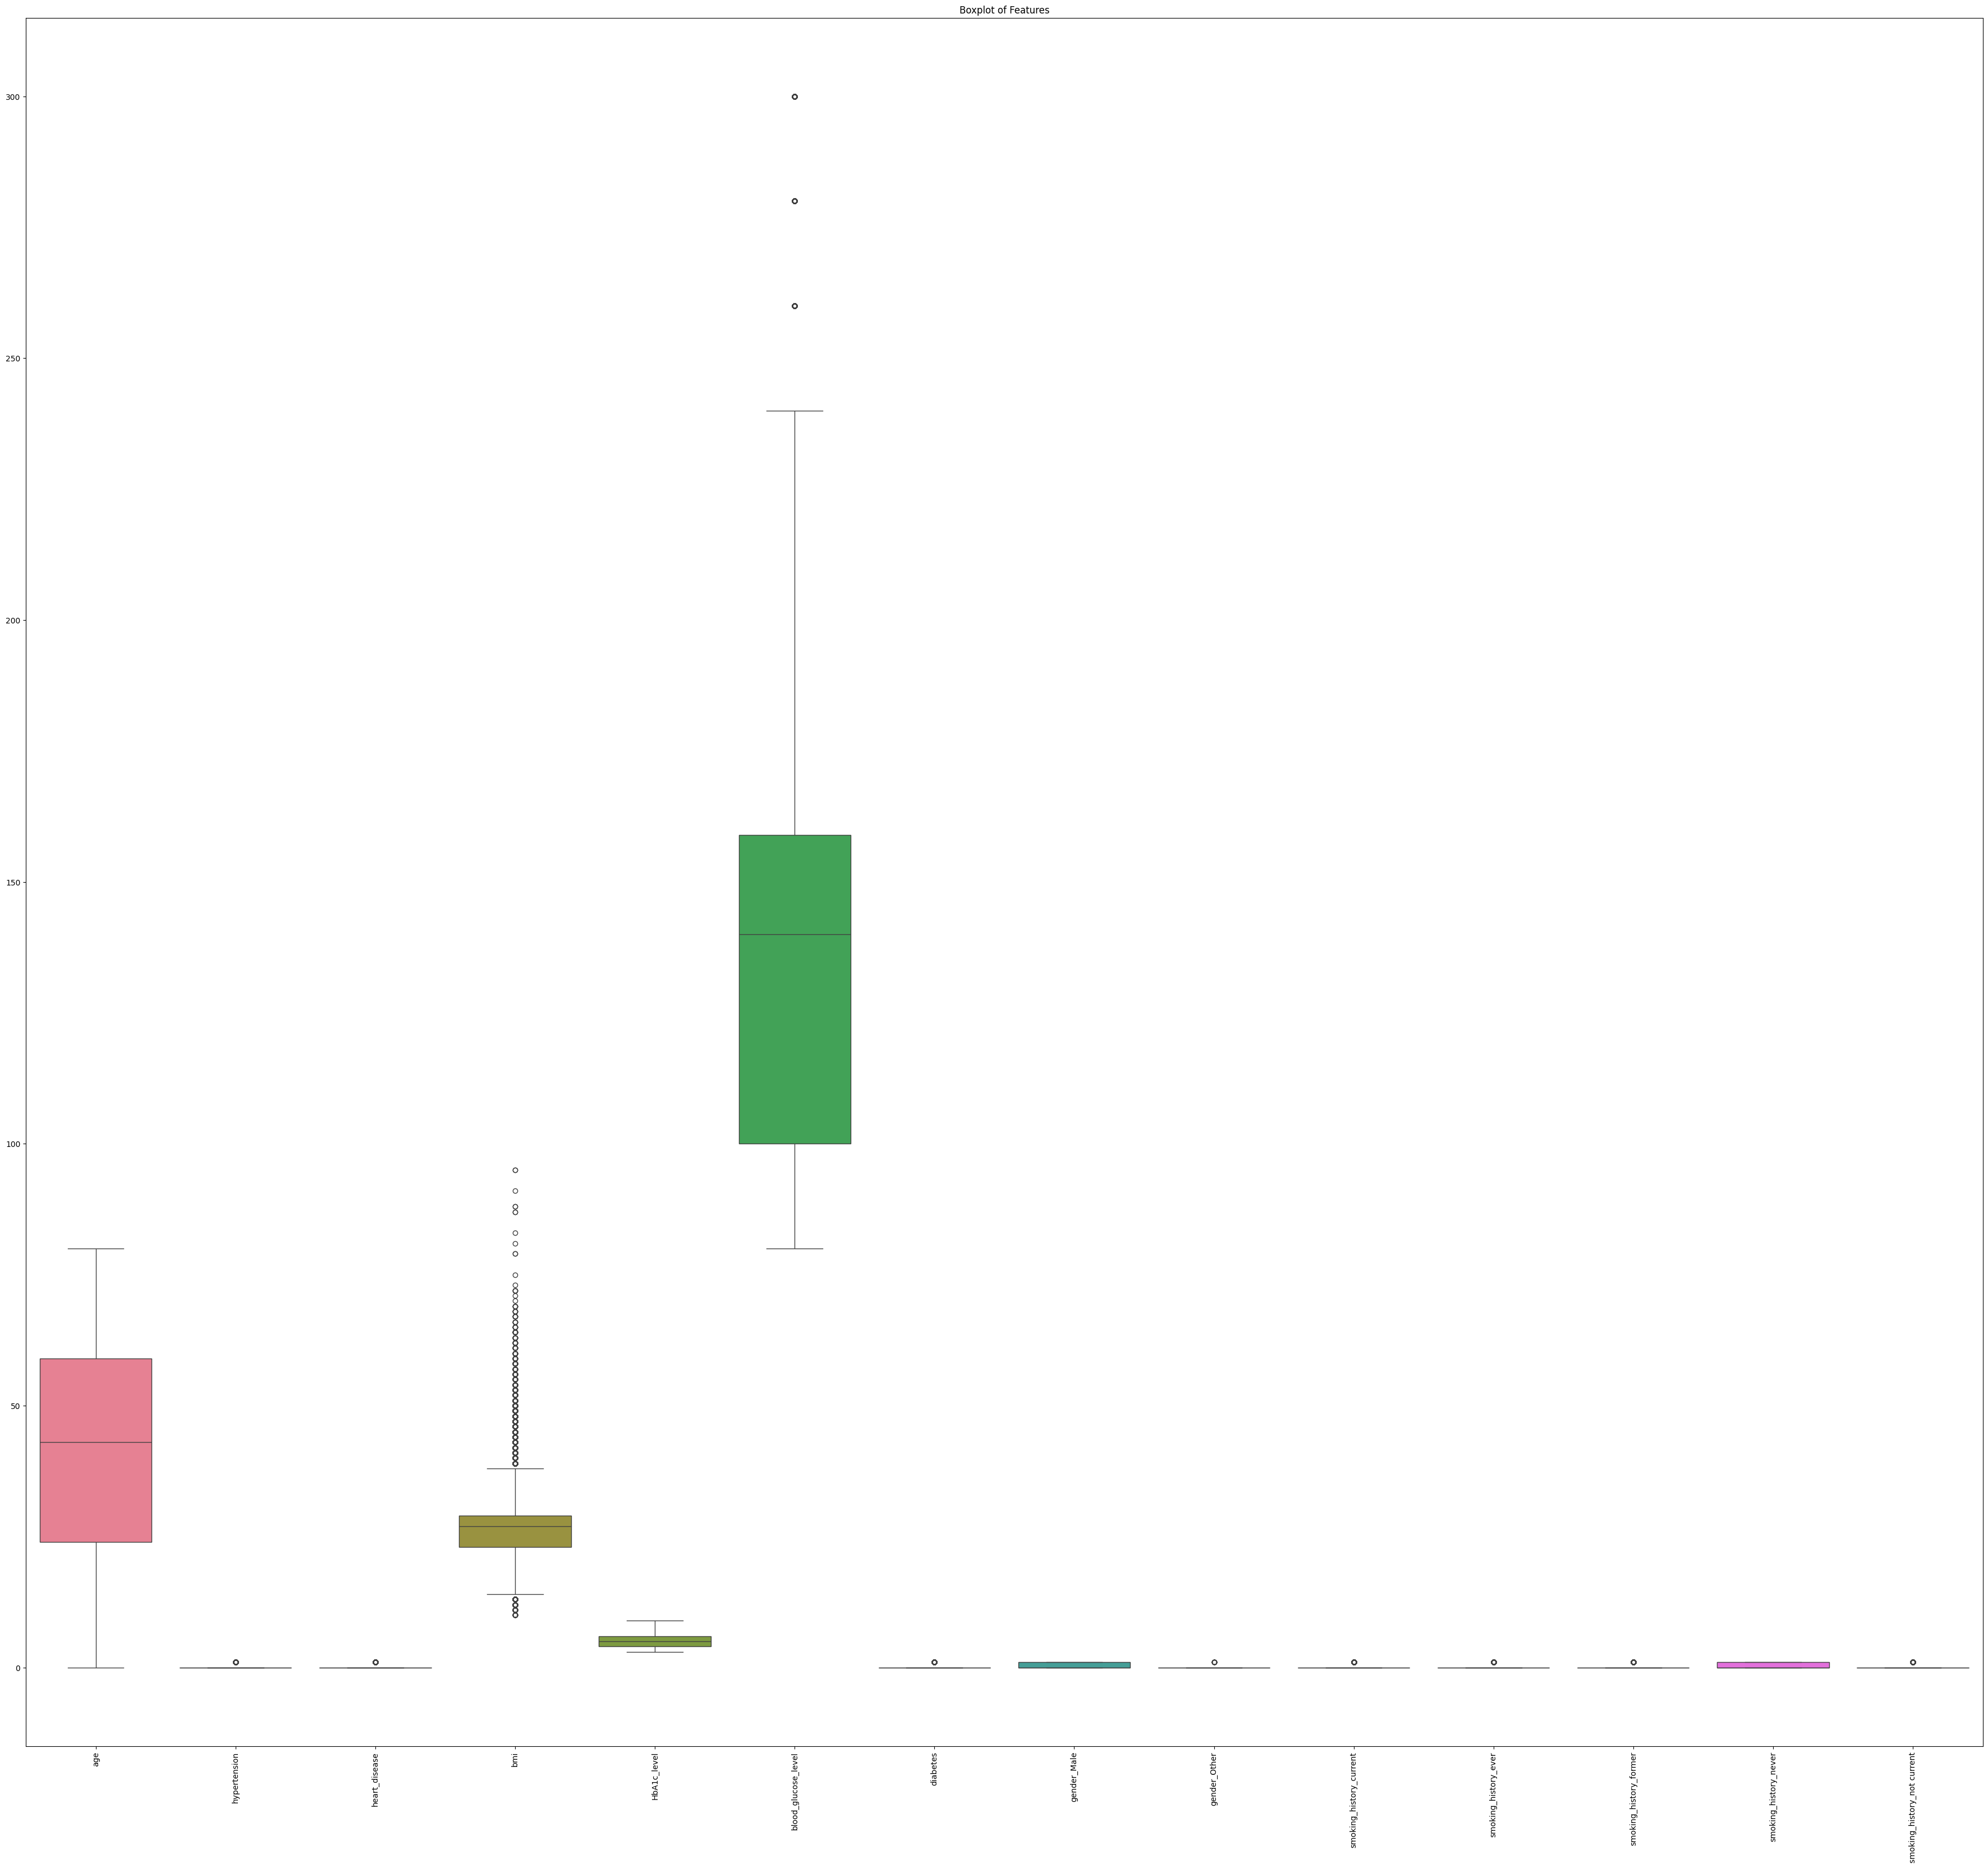

In [17]:
# Boxplot of features

plt.figure(figsize = (45,40))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
sns.boxplot(data = df_encoded)
plt.show()

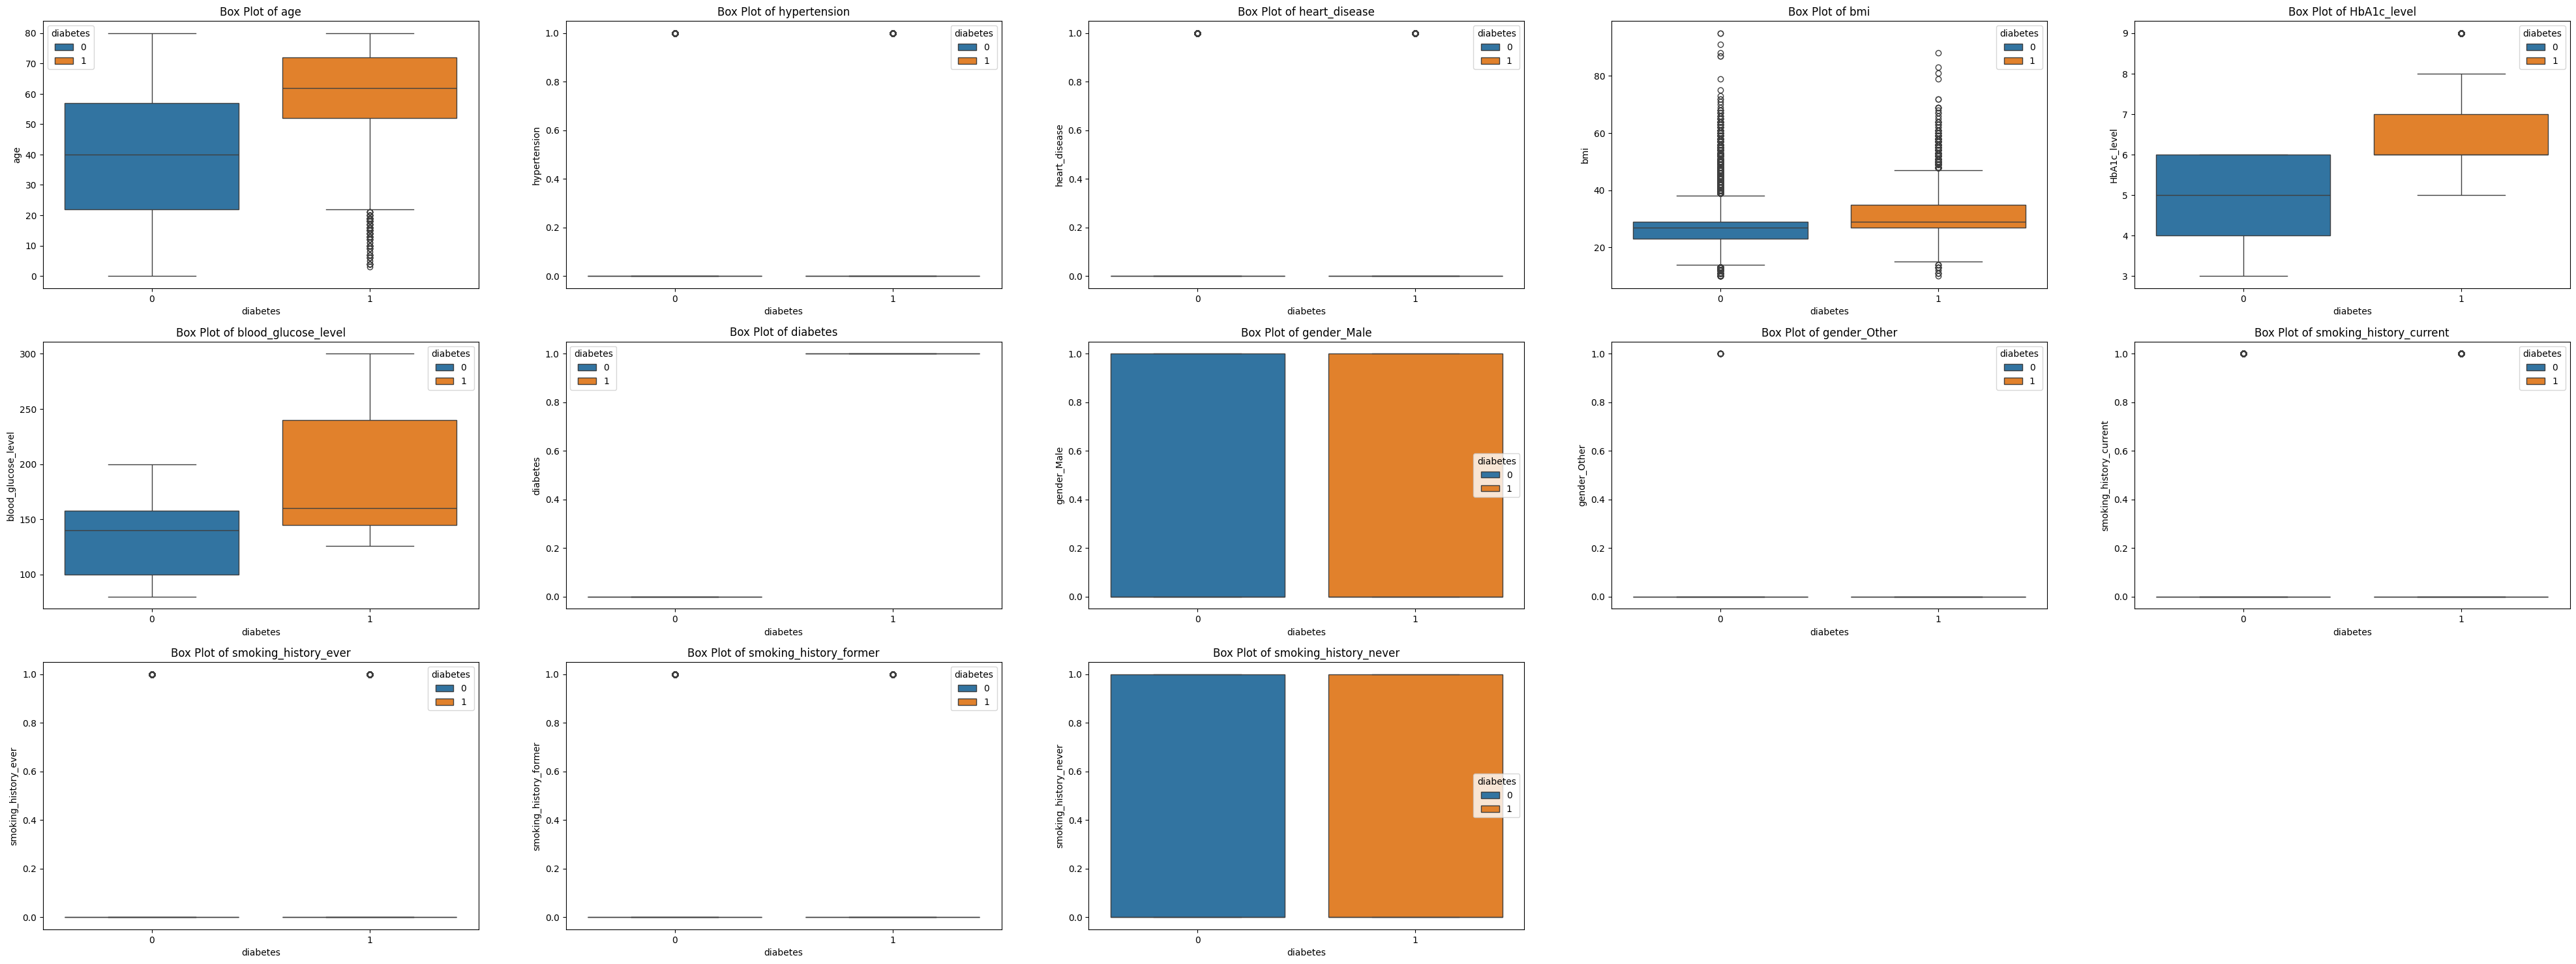

In [18]:
plt.figure(figsize=(50, 50))
for i, column in enumerate(df_encoded.columns[:-1], 1):
    plt.subplot(8, 5, i)
    sns.boxplot(x='diabetes', y=column, hue='diabetes', data=df_encoded)
    plt.title(f'Box Plot of {column}')

In [19]:
# checking for outliers

required_columns = df_encoded.drop(columns = 'diabetes')

for i in required_columns:

    q1 = df_encoded[i].quantile(0.25)
    q3 = df_encoded[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 1.5 * iqr
    upper_whisker_value = q3 + 1.5 * iqr

    outliers_iqr = (df_encoded[i] < lower_whisker_value) | (df_encoded[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

age - Outliers: 0
hypertension - Outliers: 7461
heart_disease - Outliers: 3923
bmi - Outliers: 5999
HbA1c_level - Outliers: 0
blood_glucose_level - Outliers: 2031
gender_Male - Outliers: 0
gender_Other - Outliers: 18
smoking_history_current - Outliers: 9197
smoking_history_ever - Outliers: 3998
smoking_history_former - Outliers: 9299
smoking_history_never - Outliers: 0
smoking_history_not current - Outliers: 6367


In [20]:
# checking zeros count

zeros_count = (df_encoded == 0).sum()
# Display the count of 0's for each column
print("Count of 0's in Each Column:")
print(zeros_count)

Count of 0's in Each Column:
age                              910
hypertension                   88685
heart_disease                  92223
bmi                                0
HbA1c_level                        0
blood_glucose_level                0
diabetes                       87664
gender_Male                    56179
gender_Other                   96128
smoking_history_current        86949
smoking_history_ever           92148
smoking_history_former         86847
smoking_history_never          61748
smoking_history_not current    89779
dtype: int64


It is found that most of the outliers are the count of 1s.

In [21]:
# removing outliers

# List of features to check for outliers
features_with_outliers = ['bmi', 'blood_glucose_level']

# Identify outliers using the IQR method
conditions = []
for feature in features_with_outliers:
    Q1 = df_encoded[feature].quantile(0.25)
    Q3 = df_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (df_encoded[feature] >= lower_bound) & (df_encoded[feature] <= upper_bound)
    conditions.append(condition)

# Combine conditions using logical AND
combined_condition = np.logical_and.reduce(conditions)
df_new = df_encoded[combined_condition]

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = df_new.drop(columns='diabetes')
y = df_new['diabetes']


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [23]:
# balancing the target value distribution

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_scaled, y= smote.fit_resample(X_scaled, y)
y.value_counts()

,count
diabetes,
0,83036
1,83036


### Dateset Splitting, Model Building and Evaluation

In [24]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report



X_val = X_scaled
Y_val = y

X_train, X_test, y_train, y_test = train_test_split(X_val,Y_val, test_size = 0.2, random_state = 42)

results = []

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 score': f1_score(y_test, lr_pred),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 score': f1_score(y_test, rf_pred),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Test Accuracy': accuracy_score(y_test, dt_pred),
    'Train Accuracy': accuracy_score(y_train, dt_model.predict(X_train)),
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1 score': f1_score(y_test, dt_pred),
    'Train confusion matrix': confusion_matrix(y_train, dt_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, dt_pred)
}
results.append(dt_metrics)

#  KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1 score': f1_score(y_test, knn_pred),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)

# Ada Boost
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
ad_pred = ad_model.predict(X_test)
ad_metrics = {
    'Model': 'Ada boost classifier',
    'Test Accuracy': accuracy_score(y_test, ad_pred),
    'Train Accuracy': accuracy_score(y_train, ad_model.predict(X_train)),
    'Precision': precision_score(y_test, ad_pred),
    'Recall': recall_score(y_test, ad_pred),
    'F1 score': f1_score(y_test, ad_pred),
    'Train confusion matrix': confusion_matrix(y_train, ad_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, ad_pred)
}
results.append(ad_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.862562,0.864343,0.862806,0.865123,0.863963,"[[57097, 9480], [8543, 57737]]","[[14154, 2305], [2260, 14496]]"
1,Random Forest,0.968328,0.997117,0.970518,0.966579,0.968544,"[[66427, 150], [233, 66047]]","[[15967, 492], [560, 16196]]"
2,Decision Tree,0.963992,0.997125,0.966595,0.961864,0.964224,"[[66533, 44], [338, 65942]]","[[15902, 557], [639, 16117]]"
3,KNN Classifier,0.937920,0.954161,0.911874,0.970757,0.940394,"[[61662, 4915], [1175, 65105]]","[[14887, 1572], [490, 16266]]"
4,Ada boost classifier,0.912299,0.912974,0.902296,0.926474,0.914225,"[[59801, 6776], [4786, 61494]]","[[14778, 1681], [1232, 15524]]"
